In [9]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.8 MB/s eta 0:00:00


In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 

In [25]:
#index_col=0 force pandas to not use the first column as the index
df=pd.read_csv("BA_reviews_after_DataCleaning.csv", index_col=0)
df.head()

,reviews
0,Second time BA Premium Economy in a newer ai...
1,They changed our Flights from Brussels to Lo...
2,At Copenhagen the most chaotic ticket counte...
3,Worst experience of my life trying to deal w...
4,Due to code sharing with Cathay Pacific I wa...


In [26]:
#check null values 
df.isna().sum()

reviews    0
dtype: int64

In [27]:
df.shape

(988, 1)

In [31]:
?WordCloud

In [35]:
## Start with one review:
text=df.reviews[0]

In [36]:
text

'  Second time BA Premium Economy in a newer aircraft and yet another excellent experience. Despite a three hour delay and missing my connection in Hong Kong, this was a very pleasant flight. Seats are spacious and comfortable in Premium Economy in this layout, attitude of the cabin crew was excellent and food was good. They communicate well and rebooked my connection during the flight which brought peace of mind. A very pleasant experience in BA Premium Economy after a major disappointment in Club World earlier this year.'

In [52]:
#create and generate a word cloud image:
wordcloud=WordCloud().generate(text)

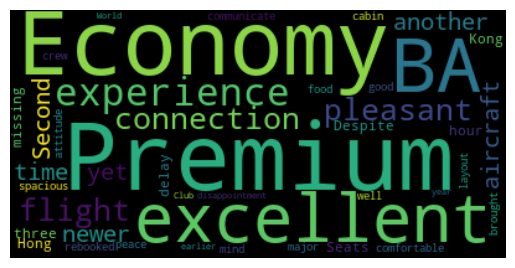

In [53]:
#display the genrated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

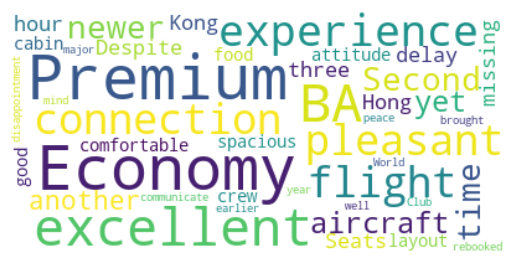

In [56]:
# lower max_font_size, change the maximum number of words and lighten the background:
wordcloud1=WordCloud(max_font_size=50,max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

In [57]:
#save the image in the folder:
wordcloud1.to_file("first_review.png")

### Combining data

In [63]:
#combine to one big text file and create big cloud 
#to see which review words are most common
text1=" ".join(reviews for reviews in df.reviews)
print("There are {} words in the combination of all reviews.".format(len(text1)))

There are 790138 words in the combination of all reviews.


In [71]:
#import stopwords
from nltk.corpus import stopwords

In [114]:
#Create stopword list:
stopwords= set()
stopwords.update(["now","BA","British Airway","British","Airway","Airways","flight","but",'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does','u', 'did', 'doing', 'a', 'an', 'the', 'and','would','could', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])

In [115]:
stopwords

{'Airway',
 'Airways',
 'BA',
 'British',
 'British Airway',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'could',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'flight',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'o

In [118]:
# Generate a word cloud image 
wordcloud2=WordCloud(stopwords=stopwords,max_font_size=40,max_words=100, background_color="white").generate(text1)

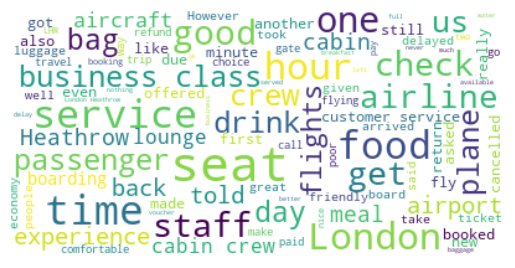

In [119]:
#display the generated image:
#the matplotlib way:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [121]:
#save the image in the folder:
wordcloud2.to_file("final_review_wordcloud.png")